## 6.4. Hedef Degisken ve Ozellikler Arasindaki Iliskiyi Anlama - Odev2

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

In [16]:
# İlk olarak, Sıcaklık verilerini Kaggle'dan indirin.

sicaklik = pd.read_csv('weatherHistory.csv')
sicaklik.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


In [17]:
# Hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu doğrusal bir regresyon modeli oluşturun. 
# Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. 
# Tahmin edilen katsayılar istatistiksel olarak anlamlı mıdır? Tahmini katsayılar önceki beklentileriniz 
# doğrultusunda mı? Tahmin edilen katsayıları yorumlayınız. Hedef ve açıklayıcı değişkenler arasındaki ilişkiler 
# nelerdir?

sicaklik['Temp_fark']=sicaklik["Apparent Temperature (C)"]-sicaklik["Temperature (C)"]

In [18]:
Y = sicaklik['Temp_fark']
X = sicaklik[['Humidity',"Wind Speed (km/h)"]]

In [19]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Temp_fark   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:55:27   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4381      0.021    115.948      0.000       2.397       2.479
Humidity             -3.0292      0.024   -126.479      0.000      -3.076      -2.982
Wind Speed (km/h)    -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Tahmin edilen model:

Sicaklik_farki = 2.4381 - 3.0292*nem - 0.1193*ruzgar_hizi

In [22]:
# Ardından, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. 
# Katsayılar istatistiksel olarak anlamlı mıdır? Nem ve rüzgar hızı için tahmini katsayıların işaretleri değişti mi?
# Tahmin edilen katsayıları yorumlayınız.

Y = sicaklik['Temp_fark']
sicaklik ['humidity_windspeed'] = sicaklik['Humidity']*sicaklik['Wind Speed (km/h)']
X = sicaklik[['Humidity',"Wind Speed (km/h)",'humidity_windspeed']]

X = sm.add_constant(X)

sonuclar = sm.OLS(Y,X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Temp_fark   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:55:45   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0839      0.033      2.511      0.012       0.018       0.149
Humidity               0.1775      0.043      4.133      0.000       0.093       0.262
Wind Speed (km/h)      0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Tahmin edilen model:

Sicaklik_farki = 0.0839 + 0.1175*nem + 0.0905*ruzgar_hizi - 0.2971*nem_ruzgar_hizi

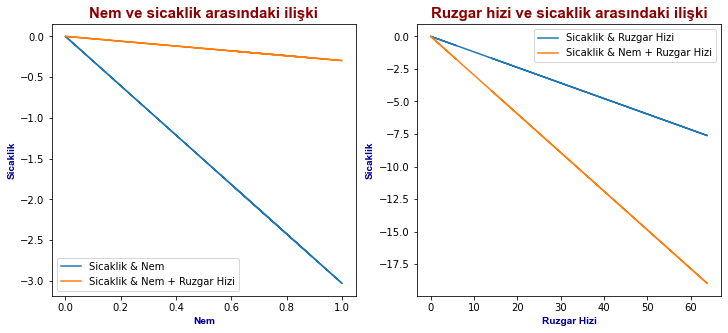

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
nem_sicaklik = sicaklik['Humidity'] * -3.0292
nem_ruzgarhizi_sicaklik = sicaklik['Humidity'] * -0.2971

plt.plot(sicaklik['Humidity'], nem_sicaklik)
plt.plot(sicaklik['Humidity'], nem_ruzgarhizi_sicaklik)
plt.legend(["Sicaklik & Nem", "Sicaklik & Nem + Ruzgar Hizi"])
plt.xlabel("Nem", fontdict=eksen_font)
plt.ylabel("Sicaklik", fontdict=eksen_font)
plt.title("Nem ve sicaklik arasındaki ilişki", fontdict=baslik_font)

plt.subplot(1,2,2)
ruzgarhizi_sicaklik = sicaklik['Wind Speed (km/h)'] * -0.1193
nem_ruzgarhizi_sicaklik = sicaklik['Wind Speed (km/h)'] * -0.2971

plt.plot(sicaklik['Wind Speed (km/h)'], ruzgarhizi_sicaklik)
plt.plot(sicaklik['Wind Speed (km/h)'], nem_ruzgarhizi_sicaklik)
plt.legend(["Sicaklik & Ruzgar Hizi", "Sicaklik & Nem + Ruzgar Hizi"])
plt.xlabel("Ruzgar Hizi", fontdict=eksen_font)
plt.ylabel("Sicaklik", fontdict=eksen_font)
plt.title("Ruzgar hizi ve sicaklik arasındaki ilişki", fontdict=baslik_font)

plt.show()

In [ ]:
# Nem arttikca hissedilen sicakligin artmasi yani hedef degiskenimizin (fark) pozitif yonde artmasini beklerken, 
# ruzgar hizinin artmasi ile de aradaki farkin negatif yonde degismesini bekleriz. 
# Bu sebeple aslinda her iki modelde cikan sonuclar kafami karistirdi. Ilkinde ikiside negatif yonde degisiklik
# gosteriyordu. 